In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# 한글 폰트 설정을 위한 코드 (이미 설정하셨다면 생략)
plt.rc('font', family='Malgun Gothic') # Windows
# plt.rc('font', family='AppleGothic') # Mac
plt.rcParams['axes.unicode_minus'] = False # 마이너스 폰트 깨짐 방지

In [2]:
df = pd.read_csv('C:/Users/sopi0/codes/korea-tour-recommender/data/3차_전처리.csv')
df

,아이디,국가별,성별,연령별,문1. 주요 방한 목적,한국 방문횟수(카테고리),문1-1. 한국여행 관심 계기_1순위,문3-1. 고려한 관광활동_1순위,문3-2. 고려한 관광인프라_1순위,"문10. 1인 1일 지출경비(영향치 결측, 61일 이상 결측, 국제교통비 제외)",...,주요 체재 지역,총 국내 지출경비,총 식비_비율,총 국내 교통비_비율,총 체험/활동비_비율,총 뷰티/의료비_비율,총 여행 서비스비_비율,숙박비_비율,쇼핑비_비율,기타 비용_비율
0,6.0,3.0,2.0,2.0,1,4.0,2.0,1.0,6.0,40.49,...,서울,1093.20,0.324863,0.120051,0.021186,0.049433,0.000000,0.112999,0.353110,0.018359
1,12.0,5.0,2.0,4.0,1,1.0,8.0,5.0,5.0,228.02,...,서울,1140.09,0.168539,0.033708,0.011236,0.000000,0.000000,0.337079,0.449438,0.000000
2,14.0,8.0,2.0,3.0,1,1.0,4.0,12.0,1.0,204.30,...,서울,1430.10,0.158730,0.088889,0.022222,0.000000,0.000000,0.666667,0.063492,0.000000
3,19.0,8.0,1.0,5.0,1,1.0,1.0,5.0,4.0,219.91,...,서울,1759.25,0.129032,0.419355,0.000000,0.000000,0.000000,0.258065,0.193548,0.000000
4,20.0,3.0,1.0,2.0,1,1.0,7.0,7.0,10.0,167.08,...,서울,1336.60,0.243902,0.170732,0.000000,0.000000,0.146341,0.195122,0.243902,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9647,21569.0,1.0,1.0,2.0,1,1.0,5.0,3.0,6.0,95.40,...,제주,477.03,0.441167,0.073538,0.000000,0.029411,0.000000,0.147056,0.294111,0.014716
9648,21570.0,1.0,1.0,4.0,1,1.0,1.0,12.0,7.0,154.33,...,제주,925.98,0.454545,0.090909,0.000000,0.000000,0.000000,0.303030,0.151515,0.000000
9649,21571.0,1.0,1.0,3.0,1,1.0,5.0,3.0,1.0,962.46,...,제주,4812.29,0.072886,0.000000,0.000000,0.000000,0.005831,0.043732,0.874636,0.002915
9650,21573.0,1.0,2.0,4.0,1,2.0,5.0,1.0,1.0,89.44,...,제주,357.77,0.392151,0.000000,0.000000,0.000000,0.000000,0.196076,0.392151,0.019622


In [3]:
df.columns

Index(['아이디', '국가별', '성별', '연령별', '문1. 주요 방한 목적', '한국 방문횟수(카테고리)',
       '문1-1. 한국여행 관심 계기_1순위', '문3-1. 고려한 관광활동_1순위', '문3-2. 고려한 관광인프라_1순위',
       '문10. 1인 1일 지출경비(영향치 결측, 61일 이상 결측, 국제교통비 제외)',
       '문9-3. 총 체재기간_61일 이상 결측', '숙박시설_그룹', '여행동반자_그룹', '방문 지역 수', '주요 체재 지역',
       '총 국내 지출경비', '총 식비_비율', '총 국내 교통비_비율', '총 체험/활동비_비율', '총 뷰티/의료비_비율',
       '총 여행 서비스비_비율', '숙박비_비율', '쇼핑비_비율', '기타 비용_비율'],
      dtype='object')

In [5]:
pd.set_option('display.max_columns', None)
df.describe()

,아이디,국가별,성별,연령별,문1. 주요 방한 목적,한국 방문횟수(카테고리),문1-1. 한국여행 관심 계기_1순위,문3-1. 고려한 관광활동_1순위,문3-2. 고려한 관광인프라_1순위,"문10. 1인 1일 지출경비(영향치 결측, 61일 이상 결측, 국제교통비 제외)",문9-3. 총 체재기간_61일 이상 결측,방문 지역 수,총 국내 지출경비,총 식비_비율,총 국내 교통비_비율,총 체험/활동비_비율,총 뷰티/의료비_비율,총 여행 서비스비_비율,숙박비_비율,쇼핑비_비율,기타 비용_비율
count,9652.000000,9652.000000,9652.000000,9652.000000,9652.0,9652.000000,9652.000000,9652.000000,9652.000000,9586.000000,9652.000000,9652.000000,9652.000000,9652.000000,9652.000000,9652.000000,9652.000000,9652.000000,9652.000000,9652.000000,9652.000000
mean,11408.332988,10.210630,1.657480,3.067136,1.0,1.900021,4.422503,4.890489,5.068898,225.398654,7.467468,1.585889,1512.276676,0.202581,0.063948,0.029606,0.017004,0.130305,0.242175,0.293240,0.021141
std,6145.203245,16.826606,0.474577,1.238374,0.0,1.154544,3.088060,3.727080,2.563810,191.094761,5.658034,0.920180,1442.413978,0.134356,0.080701,0.076291,0.082220,0.256566,0.186779,0.201652,0.066993
min,6.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,25.580000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6056.750000,3.000000,1.000000,2.000000,1.0,1.000000,1.000000,2.000000,3.000000,118.135000,4.000000,1.000000,717.355000,0.108696,0.012032,0.000000,0.000000,0.000000,0.072186,0.142648,0.000000
50%,11820.000000,6.000000,2.000000,3.000000,1.0,1.000000,4.000000,4.000000,5.000000,177.765000,6.000000,1.000000,1100.000000,0.198358,0.040244,0.000000,0.000000,0.000000,0.245098,0.264144,0.003559
75%,16848.500000,12.000000,2.000000,4.000000,1.0,3.000000,7.000000,7.000000,6.000000,268.750000,8.000000,2.000000,1788.835000,0.283350,0.084728,0.025000,0.000000,0.060532,0.370370,0.416667,0.018516
max,21575.000000,97.000000,2.000000,6.000000,1.0,4.000000,11.000000,16.000000,12.000000,2532.500000,60.000000,10.000000,12072.510000,1.000000,1.000000,0.919842,0.991080,1.000000,1.000000,1.000000,1.000000


<Axes: >

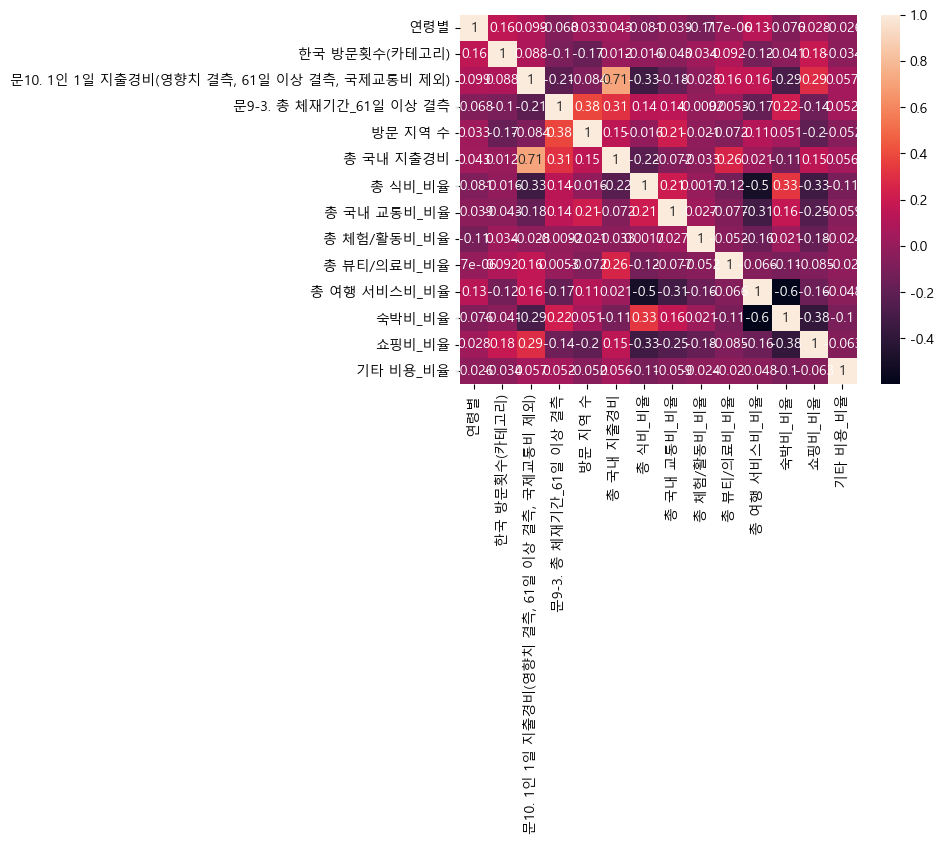

In [16]:
num_cols = ['연령별', '한국 방문횟수(카테고리)',
       '문10. 1인 1일 지출경비(영향치 결측, 61일 이상 결측, 국제교통비 제외)',
       '문9-3. 총 체재기간_61일 이상 결측', '방문 지역 수',
       '총 국내 지출경비', '총 식비_비율', '총 국내 교통비_비율', '총 체험/활동비_비율', '총 뷰티/의료비_비율',
       '총 여행 서비스비_비율', '숙박비_비율', '쇼핑비_비율', '기타 비용_비율']
sns.heatmap(df[num_cols].corr(), annot=True)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, '총 식비_비율'),
  Text(1, 0, '총 국내 교통비_비율'),
  Text(2, 0, '총 체험/활동비_비율'),
  Text(3, 0, '총 뷰티/의료비_비율'),
  Text(4, 0, '총 여행 서비스비_비율'),
  Text(5, 0, '숙박비_비율'),
  Text(6, 0, '쇼핑비_비율'),
  Text(7, 0, '기타 비용_비율')])

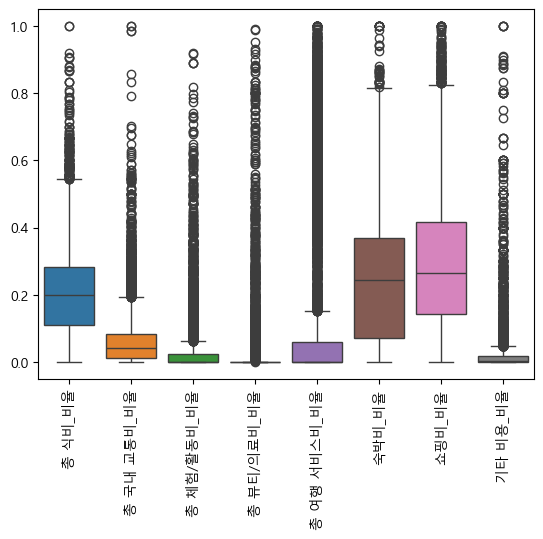

In [13]:
sns.boxplot(df[['총 식비_비율', '총 국내 교통비_비율', '총 체험/활동비_비율', '총 뷰티/의료비_비율',
       '총 여행 서비스비_비율', '숙박비_비율', '쇼핑비_비율', '기타 비용_비율']])
plt.xticks(rotation=90)


고려한 관광활동과 실제 지출 행동이 일치하는지 확인해보자

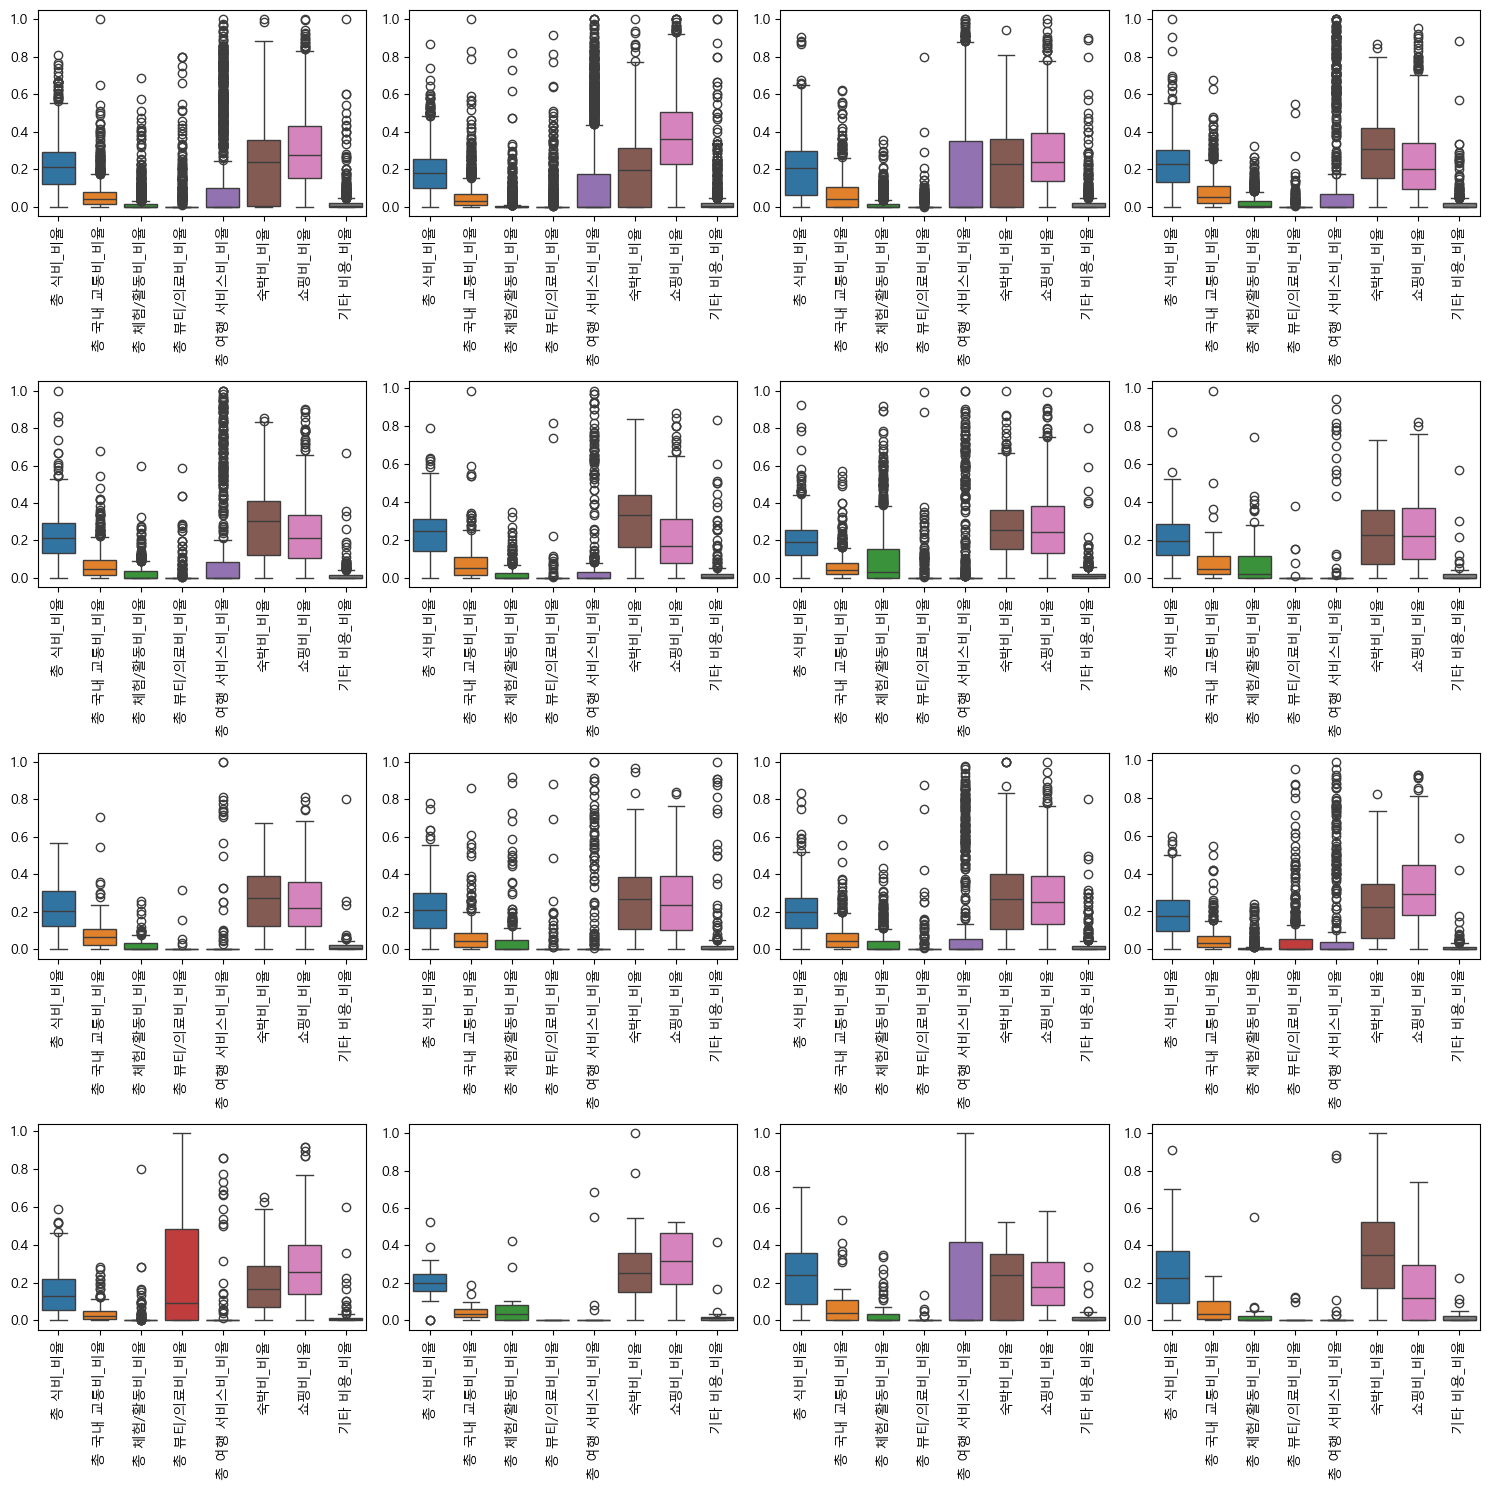

In [ ]:
fig, ax = plt.subplots(4,4, figsize=(15,15))
for i in range(16):
    tmp = df[df['문3-1. 고려한 관광활동_1순위']==(i+1)]
    sns.boxplot(tmp[['총 식비_비율', '총 국내 교통비_비율', '총 체험/활동비_비율', '총 뷰티/의료비_비율',
        '총 여행 서비스비_비율', '숙박비_비율', '쇼핑비_비율', '기타 비용_비율']], ax=ax[i//4,i%4])
    #plt.title('')
    ax[i//4,i%4].tick_params(axis='x', rotation=90)
plt.tight_layout()


지출 '비율'이라 그런지 큰 차이가 없는 것 같음...

국가별 지출비율 확인하기

In [33]:
country = ['중국',
'일본',
'대만',
'미국',
'홍콩',
'태국',
'베트남',
'말레이시아',
'필리핀',
'싱가포르',
'러시아',
'중동',
'인도네시아',
'캐나다',
'호주',
'영국',
'몽골',
'독일',
'프랑스',
'인도']

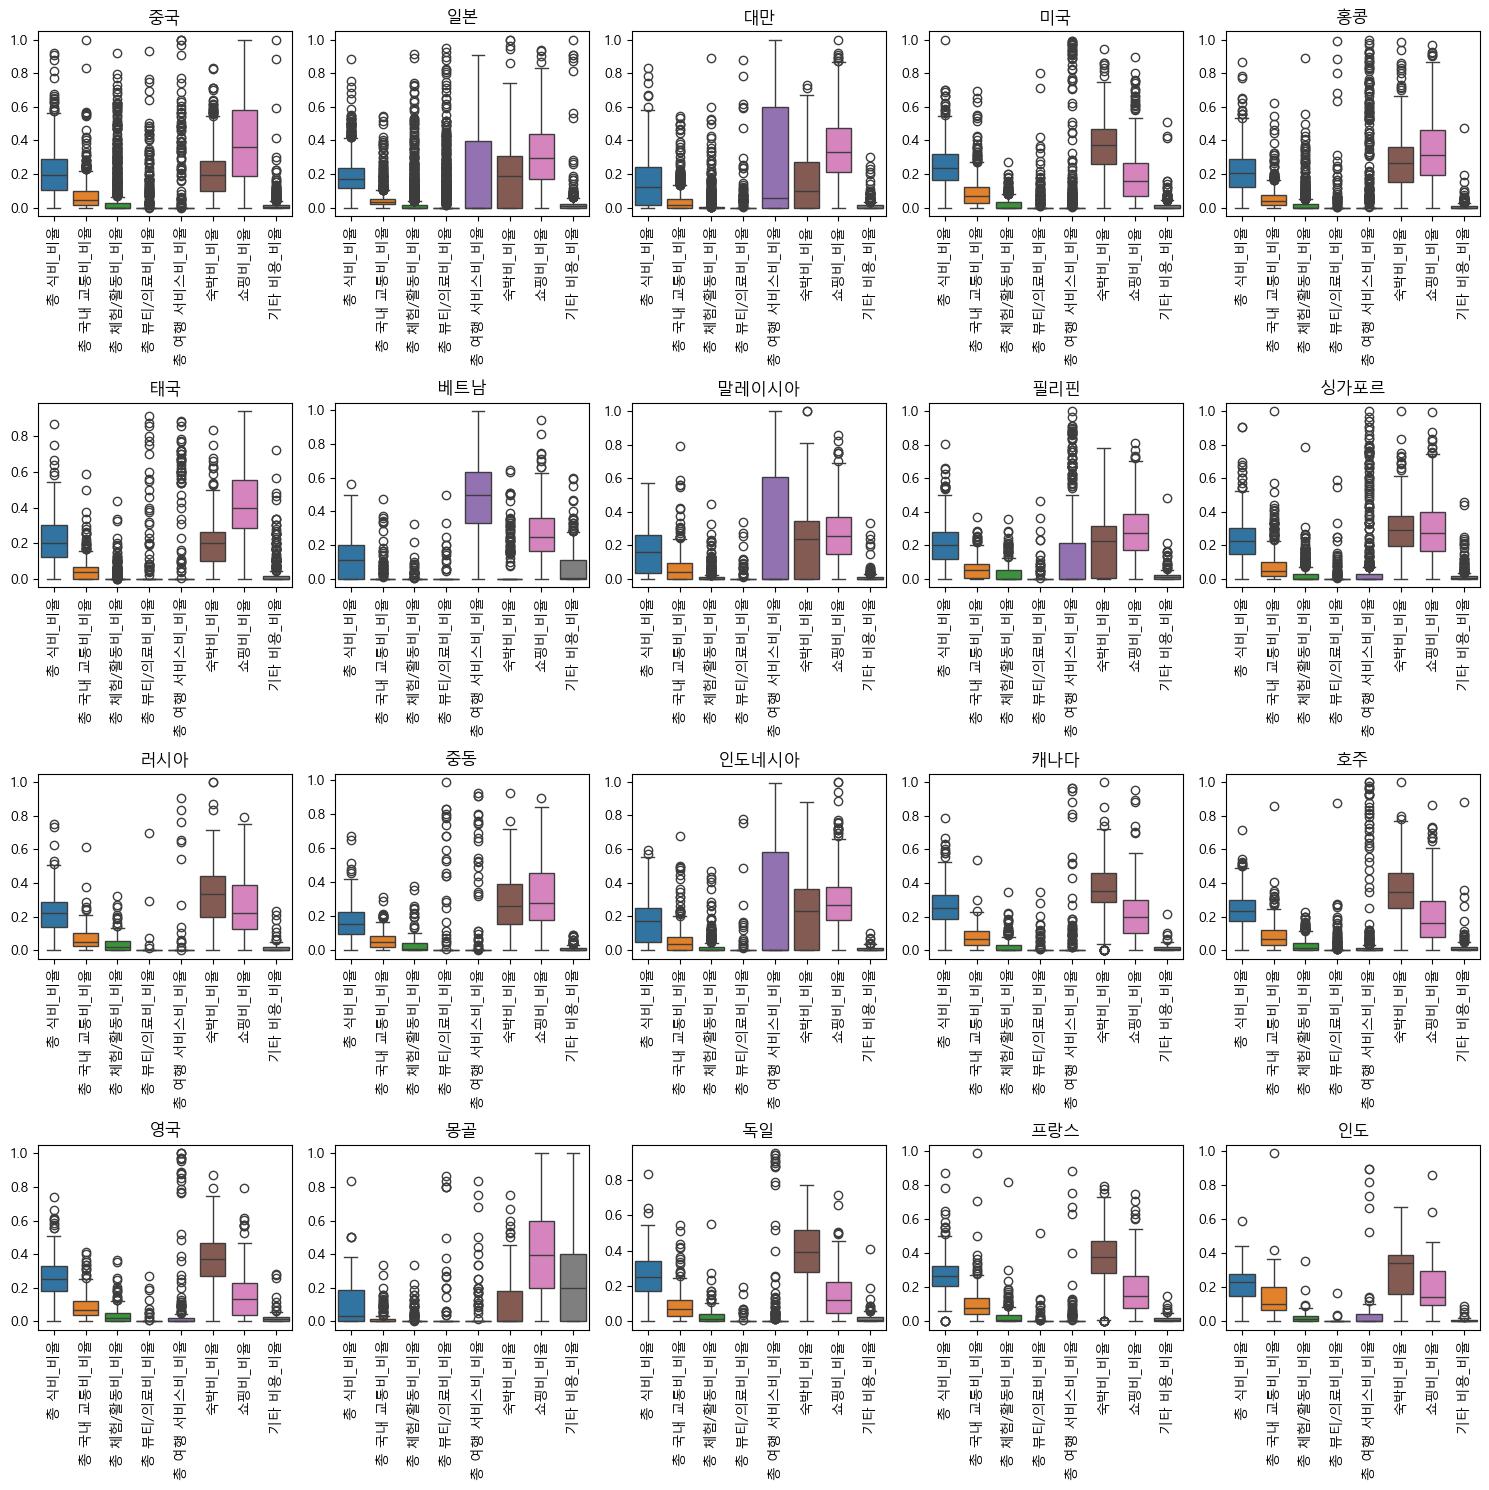

In [34]:
fig, ax = plt.subplots(4,5, figsize=(15,15))
for i in range(20):
    tmp = df[df['국가별']==(i+1)]
    sns.boxplot(tmp[['총 식비_비율', '총 국내 교통비_비율', '총 체험/활동비_비율', '총 뷰티/의료비_비율',
        '총 여행 서비스비_비율', '숙박비_비율', '쇼핑비_비율', '기타 비용_비율']], ax=ax[i//5,i%5])
    #plt.title('')
    ax[i//5,i%5].tick_params(axis='x', rotation=90)
    ax[i//5,i%5].set_title(country[i])
plt.tight_layout()


여행 서비스비에 대한 차이가 큼. => 단체여행객 여부인가?

쇼핑비에 대한 차이도 큼. 식비도 꽤...?(직전 그래프에 비하면)